In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [2]:
id = '123456789'
df = pd.DataFrame([id])

In [3]:
df.to_clipboard(index=False,header=False)

---

<div style="direction:rtl"> 
קריאה לקובץ - זה יעבוד עם קובץ הפייתון והקובץ תשובות שלכם יהיו באותה תיקייה
</div>

In [4]:
url = 'data_file_b.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,...,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Q1 

In [5]:
df.groupby(["paymentMethod"])[['monthlyCharges','totalCharges']].\
agg({'monthlyCharges': ['mean', 'median'], 'totalCharges': ['count']})

monthlyCharges         totalCharges
                                    mean  median        count
paymentMethod                                                
Bank transfer (automatic)      67.192649  73.100         1544
Credit card (automatic)        66.512385  73.025         1522
Electronic check               76.255814  80.550         2365
Mailed check                   43.917060  34.700         1612

In [6]:
df2 = df[(df["seniorCitizen"]== 1)]
df2['paymentMethod'].value_counts().head(1)

Electronic check    594
Name: paymentMethod, dtype: int64

 # Q2

In [7]:
df2 = df[(df["techSupport"]!= "unknown")]

<AxesSubplot:xlabel='monthlyCharges', ylabel='Percent'>

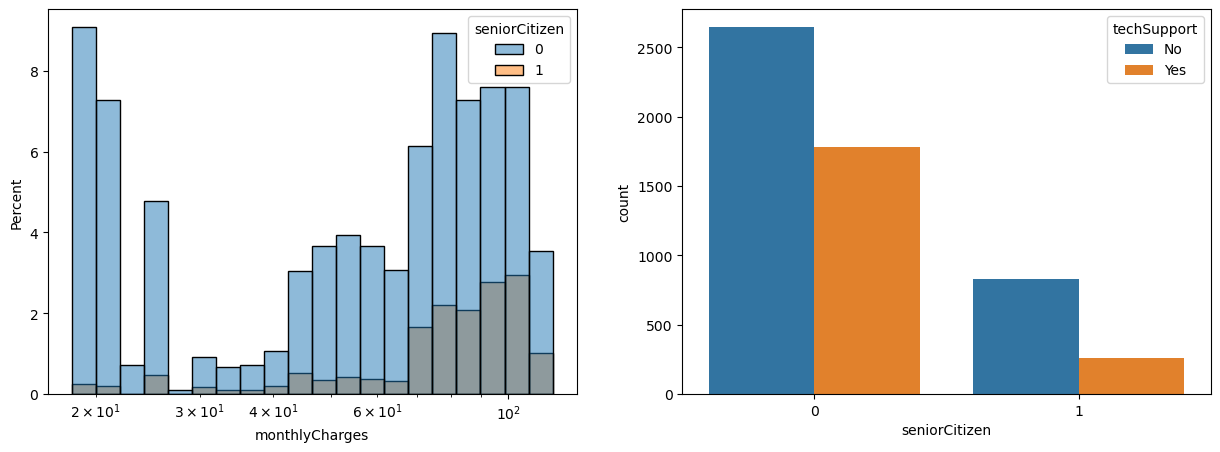

In [8]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(data = df2,  x = "seniorCitizen", hue = "techSupport",ax = ax[1])
sns.histplot(data = df, x = "monthlyCharges", hue = "seniorCitizen",ax = ax[0], log_scale = True, stat='percent')

# Q3

In [9]:
df.groupby(["gender","seniorCitizen","partner","dependents"])[["churn"]].count().sort_values('churn', ascending = False).reset_index().head(3)

,gender,seniorCitizen,partner,dependents,churn
0,Male,0,No,No,1381
1,Female,0,No,No,1338
2,Female,0,Yes,Yes,844


In [10]:
features = ["gender","seniorCitizen","partner","dependents","churn"]
df3 = pd.get_dummies(df[features])
df3.head()

,seniorCitizen,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,churn_No,churn_Yes
0,0,1,0,0,1,1,0,1,0
1,0,0,1,1,0,1,0,1,0
2,0,0,1,1,0,1,0,0,1
3,0,0,1,1,0,1,0,1,0
4,0,1,0,1,0,1,0,0,1


In [11]:
correlation_matrix = df3.corr().round(2)

<AxesSubplot:>

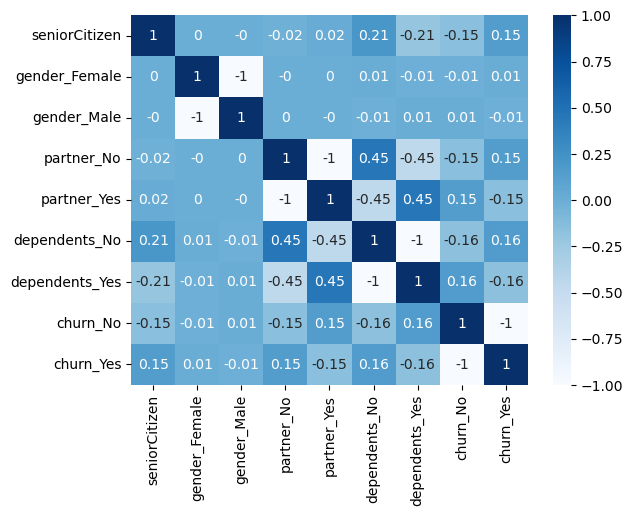

In [12]:

sns.heatmap(data=correlation_matrix, cmap='Blues', annot = True)

# Q4

In [13]:
df["gender"] = df["gender"].replace('Male',1)
df["gender"] = df["gender"].replace('Female',0)

df["partner"] = df["partner"].replace('Yes',1)
df["partner"] = df["partner"].replace('No',0)

df["dependents"] = df["dependents"].replace('Yes',1)
df["dependents"] = df["dependents"].replace('No',0)

In [14]:
X2 = df[["seniorCitizen","partner","dependents", "gender"]]
y2 = df['churn'] 
X2.head()

,seniorCitizen,partner,dependents,gender
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,0


In [15]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini", random_state = 1)
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=1) 
my_model.fit(X2_train, y2_train)
prediction = my_model.predict(X2_test)
sk.metrics.accuracy_score(prediction, y2_test)

0.7501183151916706

<AxesSubplot:ylabel='churn'>

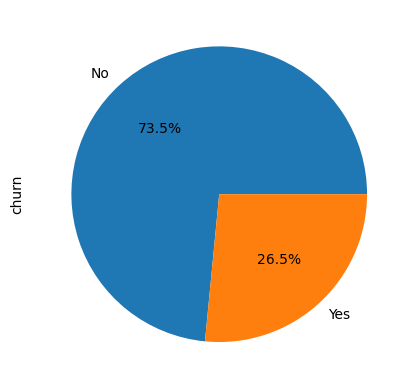

In [16]:
df['churn'].value_counts().plot.pie(autopct="%1.1f%%") 

<div style="direction:rtl"> 
הדיוק הוא 75%, שזה טוב רק במעט מול ההתפגלות של הנתונים, כלומר טוב רק במעט ממודל שבוחר בצורה רנדומית
</div>

---
# GOOD LUCK !!!!
---

In [17]:
# do not type below this line